<a href="https://colab.research.google.com/github/Sarathns05/SMS-Spam-Detector/blob/main/sms_spam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing Libraries




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from collections import Counter
import wordcloud
import pickle
import joblib

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, plot_confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import cross_val_score

  # Exploratory Data Analysis(EDA)



In [ ]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/PROJECTS/SMS spam classifier/spam.csv",encoding='Windows-1252') 
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


## Data Cleaning




In [ ]:
df.shape

(5572, 5)

In [ ]:
# Dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
#drop unwanted columns
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#check Missing Values
df.isnull().sum()

v1    0
v2    0
dtype: int64

In [ ]:
# Renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# check for duplicate values
df.duplicated().sum()

403

In [ ]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [ ]:
df['target'] = df['target'].map({'spam':1,'ham':0})

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:

df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

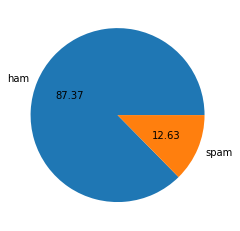

In [ ]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

## Create Seperate features to extarct Some Information

   1.Total No of Characters

   2.Total No of Words
   
   3.Total No of Sentences



In [ ]:
# Total No of characters 
df['num_characters'] = df['text'].apply(len)

# Total No of words
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

# Total No of sentences
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()


,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [ ]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()


,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


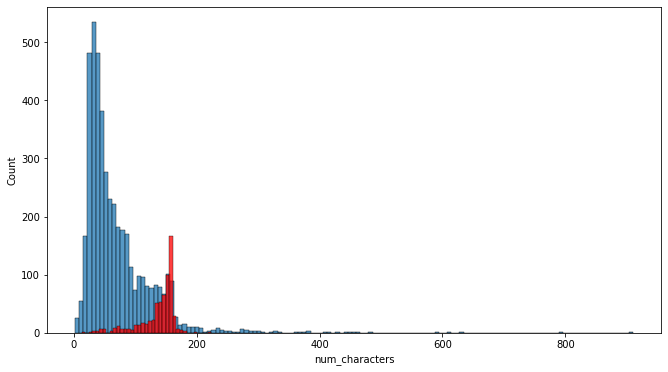

In [ ]:
plt.figure(figsize=(11,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')


           No of characters in ham is huge as compared to spam

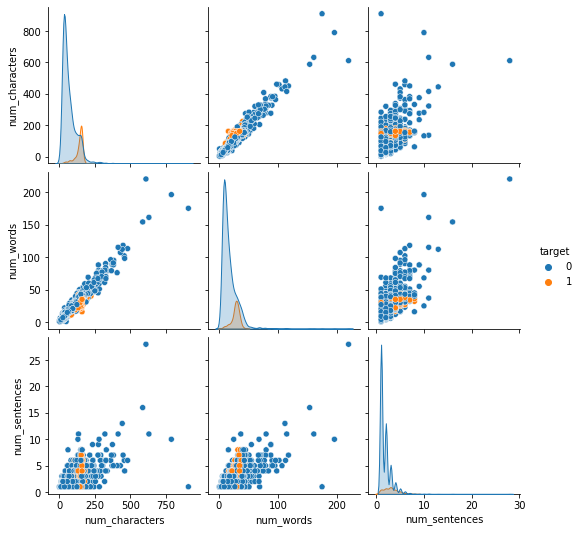

In [ ]:
sns.pairplot(df,hue='target')

###Removing Outliers

In [ ]:
i=df[df['num_characters']>500].index
df.drop(i,axis=0,inplace=True)

In [ ]:
df=df.reset_index()
df.drop("index",inplace=True,axis=1)

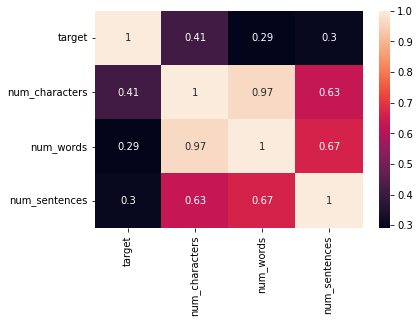

In [ ]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

   1.Lower Case

   2.Tokenisation

   3.Removing special characters

   4.Removing stop words and Punctuations

   5.Remove digits
       
   6.Stemming


In [ ]:
nltk.download('stopwords')
stopwords_list = nltk.corpus.stopwords.words("english")   
tokenizer = nltk.word_tokenize   

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def transform_text(text):
    #1.lower casing
    text=text.lower()
    
    #2.tokenization
    lst=nltk.word_tokenize(text)
    
    #3.remove spcl characters stopwords and punctuation
    l1=[]
    useless_words=stopwords.words('english')+list(string.punctuation)
    for word in lst:
        if word.isalnum()==True and word not in useless_words:
            l1.append(word)
            
    #4.stemming        
    l2=[]
    for word in l1:
        ps=PorterStemmer()
        l2.append(ps.stem(word))
        
    return " ".join(l2).strip()
    l1.clear()
    l2.clear()   


In [ ]:
def remove_digits(text): 
    clean_words = re.sub(r"[^a-zA-Z]"," ",text.lower()) 
    return clean_words 
    
df.text = df.text.apply(remove_digits) 

In [ ]:
df['text'] = df['text'].apply(transform_text)

'go jurong point crazy available bugis n great world la e buffet cine got amore wat'

# Wordcloud

In [ ]:

ham_class = df[df["target"]==0]
spam_class = df[df["target"]==1]

In [ ]:
ham_text = ' '.join(ham_class.text)
spam_text = ' '.join(spam_class.text)

In [ ]:
ham_words_cloud = wordcloud.WordCloud().generate_from_text(ham_text)
spam_words_cloud = wordcloud.WordCloud().generate_from_text(spam_text)

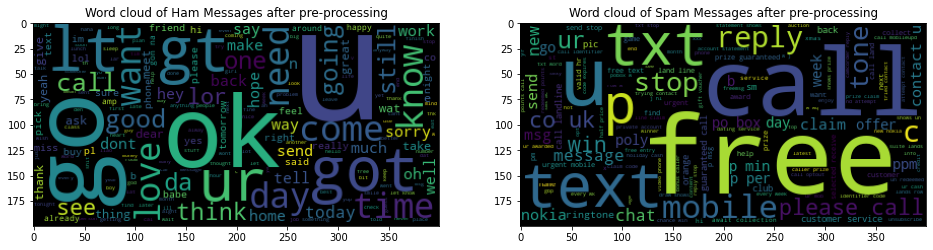

In [ ]:
plt.figure(figsize=(16,12)) 
plt.subplot(121) 
plt.title("Word cloud of Ham Messages after pre-processing") 
plt.imshow(ham_words_cloud) 
plt.subplot(122) 
plt.title("Word cloud of Spam Messages after pre-processing") 
plt.imshow(spam_words_cloud) 

##Text Vectorisation

###Bag of words

In [ ]:
cv = CountVectorizer(stop_words='english',max_features=2500,ngram_range=(1,2)) 
scaled_X = cv.fit_transform(df.text) 

In [ ]:
df_bow_sklearn = pd.DataFrame(scaled_X.toarray(),columns=cv.get_feature_names()) 
df_bow_sklearn.head() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abi,abiola,able,abt,ac,acc,accept,access,accidentally,account,...,yo yo,yoga,yogasana,yr,yr prize,yrs,yun,yup,yup thk,zed
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_bow_sklearn,df['target'],test_size=0.3,random_state=42)
clf_bow =RandomForestClassifier()
clf_bow.fit(X_train, y_train)

print(f"Train Acuracy : {clf_bow.score(X_train,y_train)}")
print(f"Test Acuracy : {clf_bow.score(X_test,y_test)}")

Train Acuracy : 0.9994465965688988
Test Acuracy : 0.9722580645161291


###TF-IDF

In [ ]:
tf_idf = TfidfVectorizer(ngram_range=(1,3),max_features=2500) 
scaled_X_tf = tf_idf.fit_transform(df.text) 

In [ ]:
df_tfidf_sklearn = pd.DataFrame(scaled_X_tf.toarray(),columns=tf_idf.get_feature_names()) 
df_tfidf_sklearn.head() 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abiola,able,abt,ac,acc,accept,access,account,account statement,account statement shows,...,yijue,ym,yo,yoga,yogasana,yr,yrs,yun,yup,zed
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
joblib.dump(df_tfidf_sklearn,'/content/drive/MyDrive/PROJECTS/SMS spam classifier/vectorized.pkl')

pickle.dump(df_tfidf_sklearn,open('vectorizer.pkl','wb'))

['/content/drive/MyDrive/PROJECTS/SMS spam classifier/vectorized.pkl']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf_sklearn,df['target'],test_size=0.3,random_state=42)
clf_tfidf =RandomForestClassifier()
clf_tfidf.fit(X_train, y_train)

print(f"Train Acuracy : {clf_tfidf.score(X_train,y_train)}")
print(f"Test Acuracy : {clf_tfidf.score(X_test,y_test)}")

Train Acuracy : 0.9994465965688988
Test Acuracy : 0.9741935483870968


TFIDF vectorization gives the best accuracy




## Train Test Split

In [ ]:
X = df_tfidf_sklearn
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

# Model Building

In [ ]:
classifiers={"svc":SVC(kernel='sigmoid', gamma=1.0),
            "knc": KNeighborsClassifier(),
             "mnb" : MultinomialNB(),
             "dtc" : DecisionTreeClassifier(max_depth=5),
             "lr" : LogisticRegression(solver='liblinear', penalty='l1'),
             "rfc" : RandomForestClassifier(n_estimators=50, random_state=2),
             "adb" : AdaBoostClassifier(n_estimators=50, random_state=2),
             "xgb" : XGBClassifier(n_estimators=50,random_state=2),
             "gbc" : GradientBoostingClassifier(n_estimators=50,random_state=2)
            }

In [ ]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    train_accuracy = clf.score(X_train,y_train)
    
    return accuracy,precision,train_accuracy

In [ ]:
accuracy_scores = []
precision_scores = []
train_accuracy_score=[]

for name,clf in classifiers.items():
    
    current_accuracy,current_precision,current_train_score = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)
    train_accuracy_score.append(current_train_score)
    print()



For  svc
Accuracy -  0.9825806451612903
Precision -  0.9675675675675676

For  knc
Accuracy -  0.9135483870967742
Precision -  0.9852941176470589

For  mnb
Accuracy -  0.9780645161290322
Precision -  1.0

For  dtc
Accuracy -  0.9425806451612904
Precision -  0.8775510204081632

For  lr
Accuracy -  0.9464516129032258
Precision -  0.903448275862069

For  rfc
Accuracy -  0.9729032258064516
Precision -  0.9702380952380952

For  adb
Accuracy -  0.9619354838709677
Precision -  0.8938547486033519

For  xgb
Accuracy -  0.9483870967741935
Precision -  0.8896103896103896

For  gbc
Accuracy -  0.9529032258064516
Precision -  0.8848484848484849



From the above all algorithms SVC gives the best Accuracy and Precision score so we will be using it.

In [ ]:
# Making the best model - SVC

svc_Clf = SVC(kernel='linear', degree=3, probability=True)
svc_Clf.fit(X_train,y_train)

SVC(kernel='linear', probability=True)

Saving the Model

In [ ]:

pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model33.pkl','wb'))